In [19]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from shapely.geometry import Polygon
from shapely.validation import make_valid

In [119]:
from skimage.io import imread

In [126]:
from skimage.transform import PiecewiseAffineTransform, warp

In [127]:
reference = imread('/mnt/c/Users/dsege/TEMP/findmycells_projects/dummy_data/reference_area.png')
rotated = imread('/mnt/c/Users/dsege/TEMP/findmycells_projects/dummy_data/rotated_area.png')

In [184]:
reference_roi = get_polygon_from_instance_segmentation(reference, 255)
ref_coords_x, ref_coords_y = np.asarray(reference_roi.boundary.xy[0]), np.asarray(reference_roi.boundary.xy[1])
np.where(ref_coords_x == ref_coords_x.min())

(array([217, 218]),)

In [183]:
tip_point_ref_index = 217
tip_point_ref_coords = (reference_roi.boundary.xy[1][tip_point_ref_index], reference_roi.boundary.xy[0][tip_point_ref_index])

In [199]:
comparison_points_reference = []
remaining_indices = (ref_coords_x.shape[0] - 217) // 5
for i in range(remaining_indices):
    comparison_points_reference.append((reference_roi.boundary.xy[1][tip_point_ref_index + i*5], reference_roi.boundary.xy[0][tip_point_ref_index + i*5]))

remainder_indices = (ref_coords_x.shape[0] - 217) % 5
starting_index = 5 - remainder_indices
n_remaining_points_to_add = (217 - starting_index) // 5 + 1
for i in range(n_remaining_points_to_add):
    comparison_points_reference.append((reference_roi.boundary.xy[1][starting_index + i*5], reference_roi.boundary.xy[0][starting_index + i*5]))

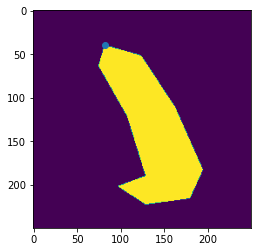

In [209]:
plt.imshow(reference)
for i in range(1):
    plt.scatter(comparison_points_reference[i][0], comparison_points_reference[i][1])

In [204]:
rotated_roi = get_polygon_from_instance_segmentation(rotated, 255)
rot_coords_x, rot_coords_y = np.asarray(rotated_roi.boundary.xy[0]), np.asarray(rotated_roi.boundary.xy[1])
np.where(rot_coords_x == rot_coords_x.min())

(array([262]),)

In [205]:
tip_point_rot_index = 262
tip_point_rot_coords = (rotated_roi.boundary.xy[1][tip_point_rot_index], rotated_roi.boundary.xy[0][tip_point_rot_index])

In [206]:
comparison_points_rotated = []
remaining_indices = (rot_coords_x.shape[0] - tip_point_rot_index) // 5
for i in range(remaining_indices):
    comparison_points_rotated.append((rotated_roi.boundary.xy[1][tip_point_rot_index + i*5], rotated_roi.boundary.xy[0][tip_point_rot_index + i*5]))

remainder_indices = (rot_coords_x.shape[0] - tip_point_rot_index) % 5
starting_index = 5 - remainder_indices
n_remaining_points_to_add = (tip_point_rot_index - starting_index) // 5 + 1
for i in range(n_remaining_points_to_add):
    comparison_points_rotated.append((rotated_roi.boundary.xy[1][starting_index + i*5], rotated_roi.boundary.xy[0][starting_index + i*5]))

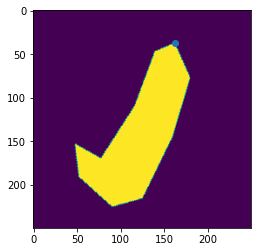

In [208]:
plt.imshow(rotated)
for i in range(1):
    plt.scatter(comparison_points_rotated[i][0], comparison_points_rotated[i][1])

In [211]:
np.asarray(comparison_points_rotated).shape

(95, 2)

In [213]:
tform = PiecewiseAffineTransform()
tform.estimate(np.asarray(comparison_points_reference), np.asarray(comparison_points_rotated))

True

In [214]:
out = warp(rotated, tform, output_shape=rotated.shape)

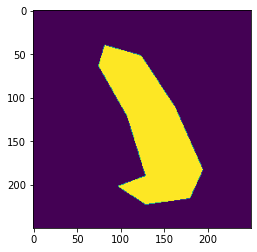

In [217]:
plt.imshow(reference + out)

In [219]:
reference[np.where(reference == 255)] = 1

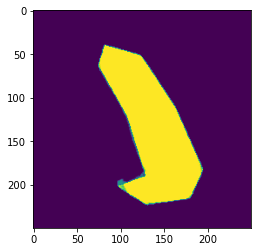

In [223]:
plt.imshow(reference + out)

In [224]:
out.shape

(250, 250)

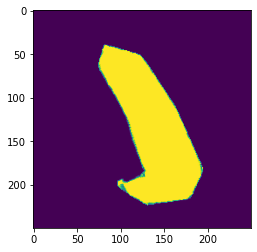

In [215]:
plt.imshow(out)

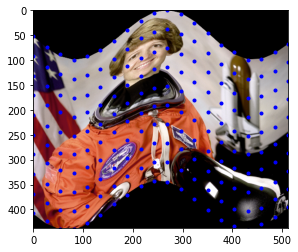

In [134]:
from skimage import data


image = data.astronaut()
rows, cols = image.shape[0], image.shape[1]

src_cols = np.linspace(0, cols, 20)
src_rows = np.linspace(0, rows, 10)
src_rows, src_cols = np.meshgrid(src_rows, src_cols)
src = np.dstack([src_cols.flat, src_rows.flat])[0]

# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - np.sin(np.linspace(0, 3 * np.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = np.vstack([dst_cols, dst_rows]).T


tform = PiecewiseAffineTransform()
tform.estimate(src, dst)

out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))

fig, ax = plt.subplots()
ax.imshow(out)
ax.plot(tform.inverse(src)[:, 0], tform.inverse(src)[:, 1], '.b')
ax.axis((0, out_cols, out_rows, 0))
plt.show()